## Data Visualization - City of Austin Shared Micromobility Vehicle Trips Data

In [3]:
# Dependencies and packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt
import pandas as pd
import geopandas as gpd
import plotly.figure_factory as ff
from matplotlib.collections import PatchCollection
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the shared mobility data csv
csvpath = os.path.join("../../resources/merged_sharedmobility.csv")
df = pd.read_csv(csvpath, index_col=0, low_memory=False)

### What days of the week?

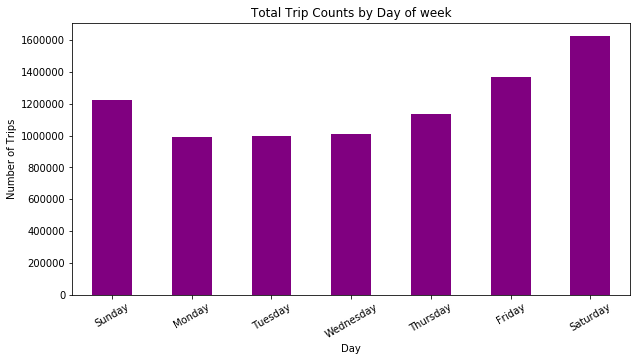

In [51]:
# Count trips per day and sort by day:
daily_total = pd.DataFrame(df["Day Of Week"].value_counts().sort_index())

# Map day of week with actual names:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_total['Day'] = days

# Plot glyph: 
daily_total.plot(kind="bar", x="Day", y="Day Of Week", 
                 title="Total Trip Counts by Day of week", 
                 figsize = (10,5), rot= 30, 
                 color = 'purple',
                 legend=False)
plt.ylabel("Number of Trips")
plt.savefig("Plots/trips_per_week.png")
plt.show()

### Which hours of the day are popular?

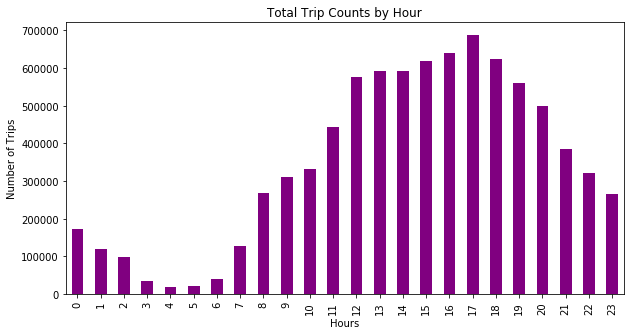

In [50]:
# Count trips per hour and sort by hour:
hourly_total = pd.DataFrame(df['Hour'].value_counts().sort_index())

hourly_total.reset_index().plot(kind='bar', 
                                x='index', 
                                y='Hour', 
                                title='Total Trip Counts by Hour', 
                                figsize = (10,5),
                                color = 'purple',
                                legend=False)
plt.xlabel('Hours')
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_hour.png")
plt.show()
#now shows correct plot with sorted xticks

### Are some months more popular than others?

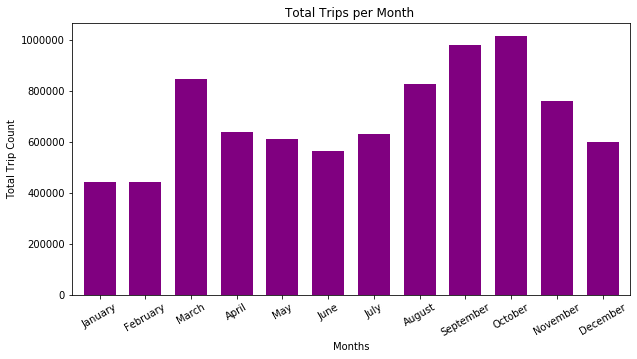

In [49]:
monthly_total = pd.DataFrame(df['Month'].value_counts()).sort_index()
import calendar
mn=[calendar.month_name[int(x)] for x in monthly_total.index.values.tolist()]

monthly_chart = monthly_total.plot.bar(title = "Total Trips per Month ",
                                       width = 0.7,
                                       figsize = (10,5),
                                       rot = 30, 
                                       legend = False,
                                       color ='purple'
                                      )
monthly_chart.set_xticklabels(mn)
monthly_chart.set_xlabel("Months")
monthly_chart.set_ylabel("Total Trip Count")
plt.savefig("Plots/trips_per_month1.png")
plt.show()
#now shows correct plot with sorted months

### Which census tracts have the most traffic?

In [5]:
# Count how many trips started in each census GEOID tract
census_trip_start = pd.DataFrame(df['Census GEOID Start'].value_counts())
census_trip_start.head(10)

Census GEOID Start
48453001100             3236435
48453000601              748545
48453000603              601132
48453000604              514316
48453001305              510164
48453000902              456009
48453001200              386962
48453000700              232937
48453001303              204956
48453001401              183566

In [6]:
# Count how many trips ended in each census GEOID tract
census_trip_end = pd.DataFrame(df['Census GEOID End'].value_counts())

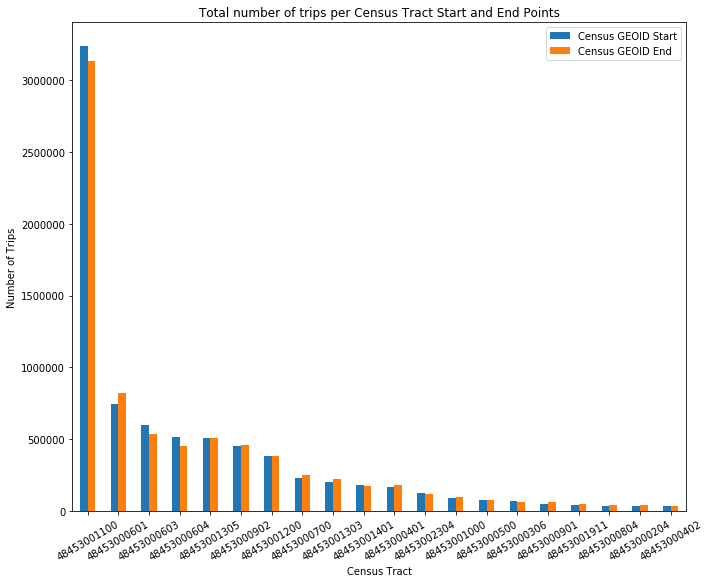

In [8]:
# Only for top 20 popular census tracts
census_traffic = census_trip_start.join(census_trip_end, how='inner')
census_traffic.head(20).plot(kind='bar', figsize = (11,9), rot = 30)
plt.title('Total number of trips per Census Tract Start and End Points')
plt.xlabel('Census Tract')
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_censustract.png")
plt.show()

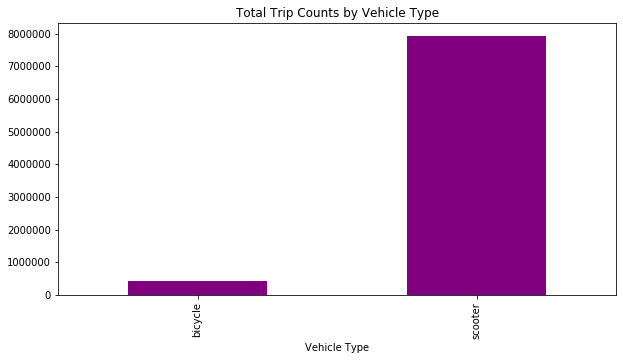

In [13]:
count_vehicletype = df.groupby("Vehicle Type")["Trip ID"].count()
count_vehicletype.reset_index().plot(kind='bar', 
                                x='index',
                                y='Vehicle Type'
                                title='Total Trip Counts by Vehicle Type', 
                                figsize = (10,5),
                                color = 'purple',
                                legend=False
                                )


### Popular Census Tracts using Geopandas

In [40]:
# Plot the census tracts from the US Census Bureau's shapefile using geopandas.
map_df = gpd.read_file('/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/tl_2010_48453_tract00/tl_2010_48453_tract00.shp')
map_df.head(1)

STATEFP00 COUNTYFP00 TRACTCE00     CTIDFP00 NAME00          NAMELSAD00  \
0        48        453    001766  48453001766  17.66  Census Tract 17.66   

  MTFCC00 FUNCSTAT00    ALAND00  AWATER00   INTPTLAT00    INTPTLON00  \
0   G5020          S  279772166   7922100  +30.5486598  -097.9935380   

                                            geometry  
0  POLYGON ((-97.95351 30.47734, -97.95502 30.476...

### Plot for Popular Census Tracts to START rides

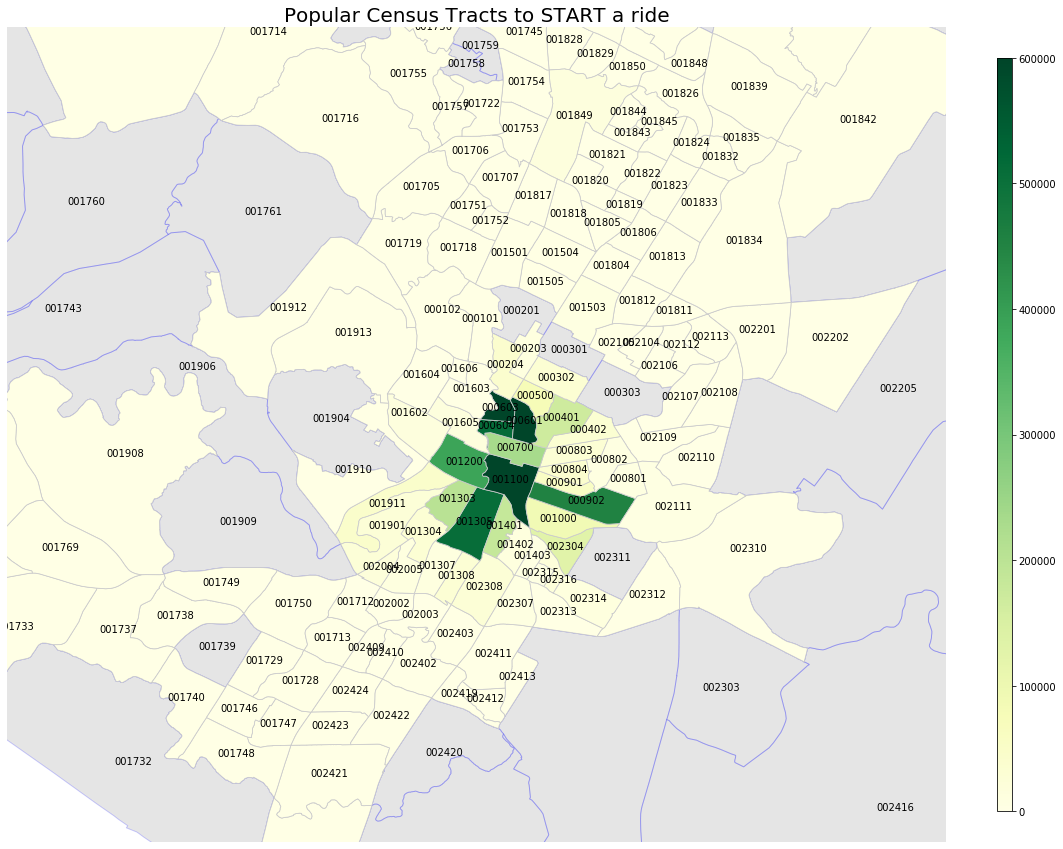

In [42]:
# Create a plot using geopandas and choropleth of census tract starts
from shapely.geometry import Point, LineString
_, ax = plt.subplots(figsize=(18, 18))
#ax_start = map_df.plot(color='0.9', figsize=(18, 18))

#census_trip_start['CTIDFP00'] = census_trip_start['Census GEOID Start']
map_df['CTIDFP00'] = map_df['CTIDFP00'].astype('int64')
map_df[['INTPTLAT00','INTPTLON00']]= map_df[['INTPTLAT00','INTPTLON00']].astype('float64')

# Merge the geodataframe with the census starts dataframe
starts_plot = map_df.set_index('CTIDFP00').join(census_trip_start, how='inner')

vmax_start = 600000
vmin_start = 0
# Render the glyphs:
map_df.plot(ax=ax, color='grey', edgecolor='blue', alpha=0.2)
starts_plot.plot(ax=ax, 
                 column='Census GEOID Start', 
                 cmap='YlGn', 
                 linewidth=0.8, 
                 edgecolor='0.8', 
                 vmax=vmax_start, 
                 vmin=vmin_start
                )

# Label census tracts
for idx, row in map_df.iterrows():
    plt.annotate(s=row['TRACTCE00'], 
                 xy=(row['INTPTLON00'], row['INTPTLAT00']), 
                 horizontalalignment='center', 
                 clip_on=True
                )

# Set the limits of the plot
# To get a zommed out view use: (-97.919881, -97.589348, 30.139918,30.426626)
# For zoomed map use : (-97.79, -97.675, 30.22, 30.31)
bbox = (-97.919881, -97.589348, 30.139918,30.426626)
plt.xlim(bbox[0], bbox[1])
plt.ylim(bbox[2], bbox[3])


plt.axis('off')
plt.title('Popular Census Tracts to START a ride',fontsize=20)
sm_start = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=vmin_start, vmax=vmax_start))

plt.colorbar(sm_start, fraction=0.015, aspect=50)
plt.savefig("Plots/choropeth_tractstart.png")
plt.show()

### Plot for Popular Census Tracts to END rides

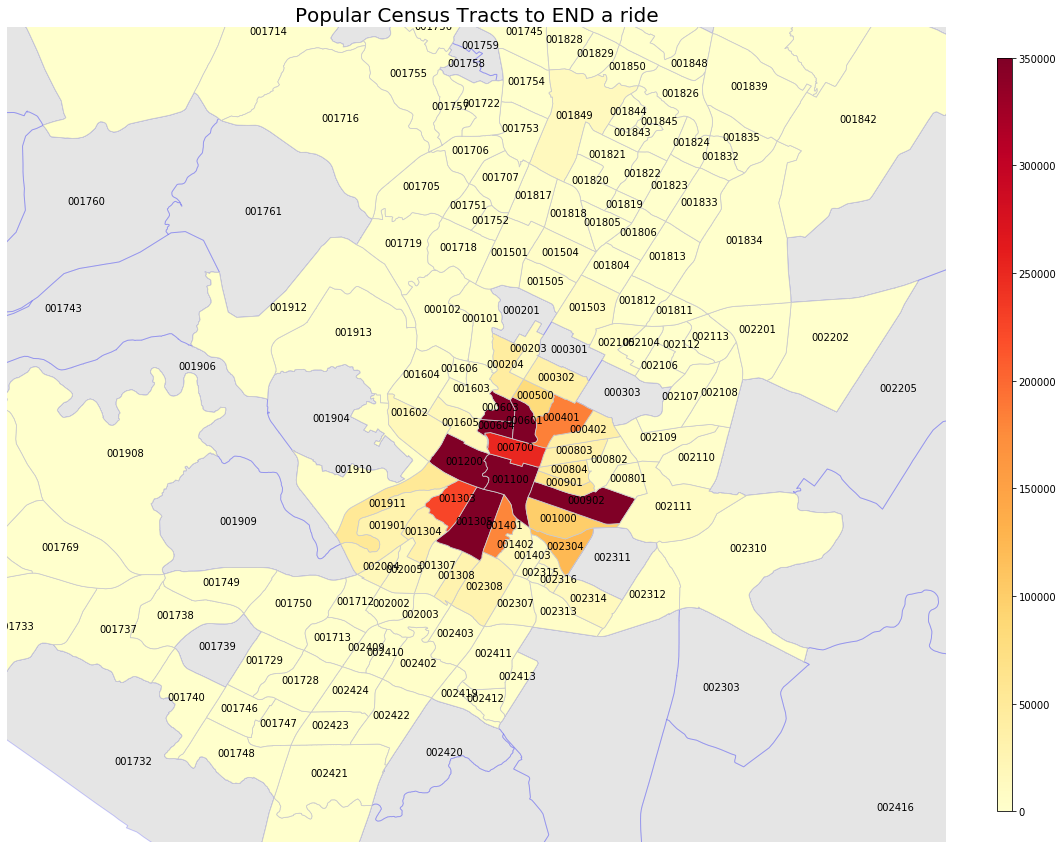

In [48]:
# Create a plot using geopandas and choropleth of census tract starts
from shapely.geometry import Point, LineString
_, ax = plt.subplots(figsize=(18, 18))

# Merge the geodataframe with the census starts dataframe
ends_plot = map_df.set_index('CTIDFP00').join(census_trip_end, how='inner')

vmax_start = 350000
vmin_start = 0
# Render the glyphs:
map_df.plot(ax=ax, color='grey', edgecolor='blue', alpha=0.2)
ends_plot.plot(ax=ax,
               column='Census GEOID End', 
               cmap='YlOrRd', 
               linewidth=0.8, 
               edgecolor='0.8', 
               vmax=vmax_start, 
               vmin=vmin_start
              )

# Label census tracts
for idx, row in map_df.iterrows():
    plt.annotate(s=row['TRACTCE00'], 
                 xy=(row['INTPTLON00'], row['INTPTLAT00']), 
                 horizontalalignment='center', 
                 clip_on=True
                )

# Set the limits of the plot
# To get a zommed out view use: (-97.919881, -97.589348, 30.139918,30.426626)
# For zoomed map use : (-97.79, -97.675, 30.22, 30.31)
bbox = (-97.919881, -97.589348, 30.139918,30.426626)
plt.xlim(bbox[0], bbox[1])
plt.ylim(bbox[2], bbox[3])


plt.axis('off')
plt.title('Popular Census Tracts to END a ride',fontsize=20)
sm_end = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin_start, vmax=vmax_start))

plt.colorbar(sm_end, fraction=0.015, aspect=50)
plt.savefig("Plots/choropeth_tractend.png")
plt.show()

### Which Zipcodes have the most traffic?

In [10]:
# Count how many trips started in each census GEOID tract
zipcode_start = pd.DataFrame(df['Zipcode Start'].value_counts())

In [11]:
# Count how many trips ended in each census tract
zipcode_end = pd.DataFrame(df['Zipcode End'].value_counts())

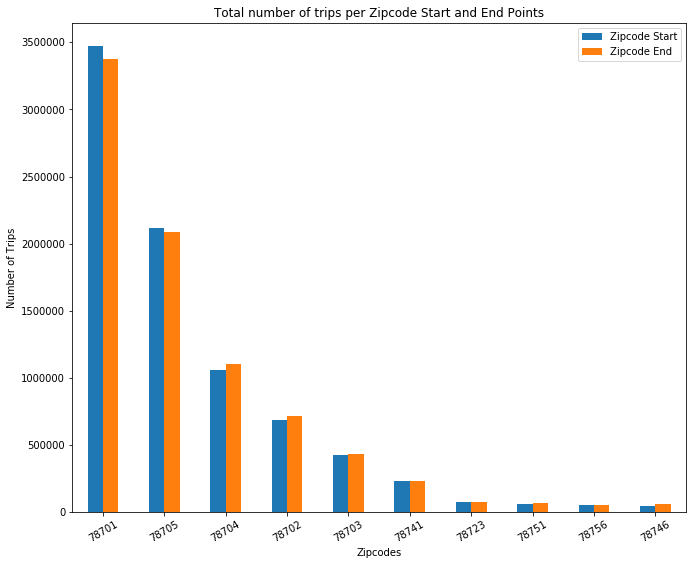

In [12]:
# Only for top 10 popular zipcodes
zipcode_traffic = zipcode_start.join(zipcode_end, how='inner')
zipcode_traffic.head(10).plot(kind='bar',figsize = (11,9), rot = 30)
plt.title('Total number of trips per Zipcode Start and End Points')
plt.xlabel('Zipcodes')
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_zipcode.png")
plt.show()

### Popular routes to start/end a trip? (Further work)
##### Find the center of the shapefiles and join with a line for start and end census tracts:

In [169]:
polygon_lookup = map_df[["CTIDFP00", "geometry"]].set_index("CTIDFP00")["geometry"].to_dict()

def get_center_from_polygon(polygon):
    x = polygon.centroid.x
    y = polygon.centroid.y
    return x, y

In [170]:
def get_center_from_tract_id(id):
    return get_center_from_polygon(polygon_lookup[id])

In [173]:
get_center_from_tract_id(48453002410)

(-97.78666542812522, 30.205764476603573)

In [145]:
get_center_from_polygon(map_df["geometry"][0])

(-97.99812630645184, 30.539390025720902)

In [4]:
for idx, row in df.iterrows()

### Attempt to use Street Centerline Shape files

In [6]:
from shapely.geometry import Point, LineString
streets = gpd.read_file('/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/Street Centerline/geo_export_c8b73b25-2ed4-4cce-b27a-5b77fe19ba06.shp')
streets = streets.to_crs(census.crs)

In [22]:
streets.head()

geometry
0  LINESTRING (-97.68217 30.31111, -97.68202 30.3...
1  LINESTRING (-97.83916 30.52056, -97.83916 30.5...
2  LINESTRING (-97.89384 30.37534, -97.89434 30.3...
3  LINESTRING (-97.76743 30.13483, -97.76796 30.1...
4  LINESTRING (-97.84643 30.56331, -97.84806 30.5...